In [1]:
import math
from scipy import interpolate
import gsw
from xmitgcm import open_mdsdataset
import numpy as np
import xarray as xr
import copy
from matplotlib import pyplot as plt
import matplotlib.colors
%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 14
    , 'legend.markerscale': 1., 'axes.titlesize': 14, 'axes.labelsize' : 14,
      'legend.fontsize' : 14,'legend.handlelength': 2})

plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

In [3]:
t0 = 280
t1 = 300

data_dir = '/WORK/sio_goc03/pv_flux/coarse_0918/den_jump2/'
ds = open_mdsdataset(data_dir, prefix={'xyMom_ave'}).chunk()
 
uvel = ds.UVEL[t0:t1, 0, :, :]
vvel = ds.VVEL[t0:t1, 0, :, :]
uvelsq = ds.UVELSQ[t0:t1, 0, :, :]
vvelsq = ds.VVELSQ[t0:t1, 0, :, :]
eke_u = 0.5 * (uvelsq - uvel**2) * 1e4
eke_v = 0.5 * (vvelsq - vvel**2) * 1e4
#eke_u = eke_u.where(eke_u != 0)

eke_u = eke_u.values
eke_v = eke_v.values
    
eke = eke_u + eke_v

eke11 = np.mean(eke, 0)

/WORK/sio_goc03/anaconda3/envs/eddypy/lib/python3.5/site-packages/xmitgcm/mds_store.py:217: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  ds = xr.auto_combine(datasets)
/WORK/sio_goc03/anaconda3/envs/eddypy/lib/python3.5/site-packages/xmitgcm/mds_store.py:217: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).The datasets supplied require both concatenation and merging. From
xarray version 0.14 this will operation will require either using the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset), with a nested list structure such that you can combine
along 

In [4]:
t0 = 30
t1 = 50

data_dir = '/WORK/sio_goc03/pv_flux/fine_0918/crun_0.3/'
ds = open_mdsdataset(data_dir, prefix={'xyMom_ave'}).chunk()
 
uvel = ds.UVEL[t0:t1, 0, :, :]
vvel = ds.VVEL[t0:t1, 0, :, :]
uvelsq = ds.UVELSQ[t0:t1, 0, :, :]
vvelsq = ds.VVELSQ[t0:t1, 0, :, :]
eke_u = 0.5 * (uvelsq - uvel**2) * 1e4
eke_v = 0.5 * (vvelsq - vvel**2) * 1e4
eke_u = eke_u.where(eke_u != 0)

eke_u = eke_u.values
eke_v = eke_v.values
    
eke = eke_u + eke_v

eke21 = np.nanmean(eke, 0)

/WORK/sio_goc03/anaconda3/envs/eddypy/lib/python3.5/site-packages/xmitgcm/mds_store.py:217: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  ds = xr.auto_combine(datasets)
/WORK/sio_goc03/anaconda3/envs/eddypy/lib/python3.5/site-packages/xmitgcm/mds_store.py:217: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).The datasets supplied require both concatenation and merging. From
xarray version 0.14 this will operation will require either using the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset), with a nested list structure such that you can combine
along 

In [5]:
data_dir = '/WORK/sio_goc03/pv_flux/fine_0918/den_jump2/'
ds = open_mdsdataset(data_dir, prefix={'xyMom_ave'}).chunk()
 
uvel = ds.UVEL[t0:t1, 0, :, :]
vvel = ds.VVEL[t0:t1, 0, :, :]
uvelsq = ds.UVELSQ[t0:t1, 0, :, :]
vvelsq = ds.VVELSQ[t0:t1, 0, :, :]
eke_u = 0.5 * (uvelsq - uvel**2) * 1e4
eke_v = 0.5 * (vvelsq - vvel**2) * 1e4
eke_u = eke_u.where(eke_u != 0)

eke_u = eke_u.values
eke_v = eke_v.values
    
eke = eke_u + eke_v

eke22 = np.nanmean(eke, 0)

/WORK/sio_goc03/anaconda3/envs/eddypy/lib/python3.5/site-packages/xmitgcm/mds_store.py:217: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  ds = xr.auto_combine(datasets)
/WORK/sio_goc03/anaconda3/envs/eddypy/lib/python3.5/site-packages/xmitgcm/mds_store.py:217: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).The datasets supplied require both concatenation and merging. From
xarray version 0.14 this will operation will require either using the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset), with a nested list structure such that you can combine
along 

In [6]:
data_dir = '/WORK/sio_goc03/pv_flux/fine_32/crun/'
ds = open_mdsdataset(data_dir, prefix={'xyMom_ave'}).chunk()

uvel = ds.UVEL[t0:t1, 0, :, :]
vvel = ds.VVEL[t0:t1, 0, :, :]
uvelsq = ds.UVELSQ[t0:t1, 0, :, :]
vvelsq = ds.VVELSQ[t0:t1, 0, :, :]
eke_u = 0.5 * (uvelsq - uvel**2) * 1e4
eke_v = 0.5 * (vvelsq - vvel**2) * 1e4
eke_u = eke_u.where(eke_u != 0)

eke_u = eke_u.values
eke_v = eke_v.values
    
eke = eke_u + eke_v

eke24 = np.nanmean(eke, 0)

/WORK/sio_goc03/anaconda3/envs/eddypy/lib/python3.5/site-packages/xmitgcm/mds_store.py:217: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  ds = xr.auto_combine(datasets)
/WORK/sio_goc03/anaconda3/envs/eddypy/lib/python3.5/site-packages/xmitgcm/mds_store.py:217: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).The datasets supplied require both concatenation and merging. From
xarray version 0.14 this will operation will require either using the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset), with a nested list structure such that you can combine
along 

/WORK/sio_goc03/anaconda3/envs/eddypy/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]
/WORK/sio_goc03/anaconda3/envs/eddypy/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()
/WORK/sio_goc03/anaconda3/envs/eddypy/lib/python3.5/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice


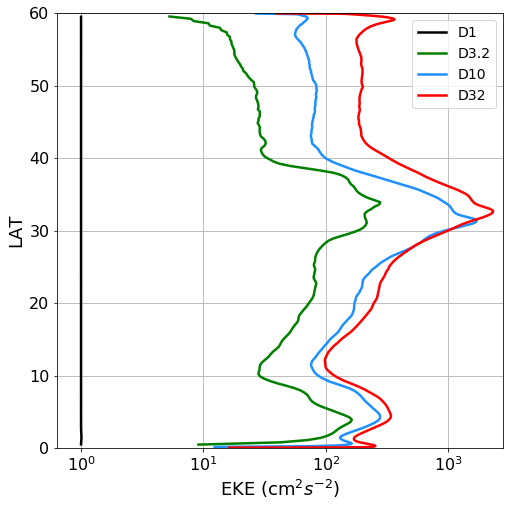

In [9]:
lat1 = np.arange(0.5, 60, 1)
lat2 = np.arange(0.05, 60, 0.1)
lat4 = np.arange(0.03125/2, 60, 0.03125)

fig = plt.figure(figsize=(8, 8))

#plt.subplot(121)

datatmp = np.log10(np.nanmean(eke11[:, :]+1, 1))
plt.plot(datatmp, lat1, color='k', linewidth=2.5, linestyle='-', label='D1')


datatmp = np.log10(np.nanmean(eke21[:, :], 1))
plt.plot(datatmp, np.arange(0.3125/2, 60, 0.3125), color='g', linewidth=2.5, label='D3.2')

datatmp = np.log10(np.nanmean(eke22[:, :], 1))
plt.plot(datatmp, lat2, color='dodgerblue', linewidth=2.5, label='D10')

datatmp = np.log10(np.nanmean(eke24[:, :], 1))
plt.plot(datatmp, lat4, color='r', linewidth=2.5, label='D32')

levs2 = np.array([np.log10(1), np.log10(10), np.log10(100), np.log10(1000)])
plt.xticks(levs2, ('$10^{0}$', '$10^{1}$', '$10^{2}$', '$10^{3}$'))
plt.xlim(-0.2, np.log10(2800))

plt.ylabel('LAT', size=18)
plt.xlabel('EKE (cm$^2 s^{-2}$)', size=18)
#plt.title('0.1 degree')

plt.grid()
plt.legend(loc=1)
plt.ylim(0, 60)
#plt.text(-0.2, 62, '(a)', size=20)

savename = './pics/Figure_03.png'
plt.savefig(savename, dpi=200)
